### Importing necessary noUDF

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os
import sys

### Defining the path to necessary packages.

In [13]:
module_path = os.path.join(os.path.dirname( os.getcwd())) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

from Modules.Classes import MultiOutputLinearRegression, ModelComparator


### Defining constants for the models.

In [14]:
#The datatype of each feature of the dataframe.
dtypes = { "Make": "string", 
            "Model":"string",
            "Vehicle Class":"string",
            "Engine Size(L)":np.float64,
            "Cylinders":np.int16,
            "Transmission":"string",
            "Fuel Type":"string",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


# Define the dictionary of  ML models we will be training.
Models = {
    "DrzewkoDecyzyjne": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
    "LasLosowy": RandomForestClassifier(n_estimators=15, criterion='gini'), 
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RegresjaLogistyczna": LogisticRegression(max_iter = 200,),
   "RegresjaLiniowa":MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DrzewkoDecyzyjne":{"criterion":['gini','entropy'],
                                       "splitter":['best','random'],
                                       "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},

                    "LasLosowy":{"n_estimators":list(range(5, 25, 5)),
                                        "min_samples_split":[2,3],
                                       "min_samples_leaf":[2,3]},
                                       
                  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                            "p":[1,2]},
                            
                        "RegresjaLogistyczna": {
                        "max_iter":[250, 300],
                            "penalty":['l2'],
                              "solver":['liblinear','newton-cg',],
                              
                        },
                     "RegresjaLiniowa":{},
                             }



### Exploratory Data Analysis (EDA) section.

In [15]:

target_var: str = "CO2 Emissions(g/km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int = 15 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.


ModelComparator = ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = [-float('inf'), 150, 250, float('inf')], show_plots = False
                                        )

ModelComparator.descriptive_statistics()


### Training-the-models section.

In [16]:
ModelComparator.train_models()

0


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13769733212159352, -0.11040347997253397, -0.28147474937425043, -0.11637548610733041, -0.3743964162295436, -0.16560521995880095, -0.21220584057545525, -0.39636062328884597, -0.14948701855038718, -0.25826444741985577, -0.1364623535237338, -0.4151360068477313, -0.29267914185074395, -0.23778789808576334, -0.168644101320226, -0.20817879828045857, -0.26409800623744756, -0.24823739572950007, -0.15284669688150807, -0.21615787169375816, -0.1614644341671908, -0.12479880540984786, -0.22157232431951146, -0.34276482670524105, -0.2334771860611605, -0.1676

1


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13769733212159352, -0.11342879298653222, -0.27230371714829393, -0.37258334786843855, -0.16763726186602643, -0.20899041460713885, -0.3993392205920901, -0.1572146243969032, -0.25826444741985577, -0.14371312394574168, -0.41635759656091714, -0.29383369916131774, -0.23920753994049024, -0.24891843238846806, -0.1696449653077703, -0.21220584057545525, -0.2595721238681445, -0.24686968617112257, -0.1582877742228606, -0.21771859861645051, -0.1614644341671908, -0.1301117489252866, -0.22233505402549258, -0.3291595815614968, -0.23707488929002463, -0.271681307838081, -0.18764983291616696, -0.3187073944080697, -0.1645797907807484, -0.11491158524078204, -0.19646443249388615, -0.30010437775659166, -0.22460770307587966, -0.18400579995422325, -0.521746490846868, -0.4204039267843044, -0.5562943003208767, -0.29612930982848606, -0.14720463

2


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13769733212159352, -0.1206606721314831, -0.273544287202482, -0.11637548610733041, -0.3770996745563874, -0.168644101320226, -0.2065459981823903, -0.39763989705061825, -0.15061523846959088, -0.26281285016197176, -0.13892133247839358, -0.4073142013756565, -0.2891878144208021, -0.23920753994049024, -0.24618298195866548, -0.20736400533681806, -0.261521378709128, -0.252966151980339, -0.22309517608564877, -0.1645797907807484, -0.12343484308556128, -0.21849478146555132, -0.3432583688279746, -0.23991421072656197, -0.16354793239068163, -0.2647382447678514, -0.19473343458895, -0.3160403400351626, -0.16041253740516406, -0.11342879298653222, -0.30179195082237514, -0.22460770307587966, -0.18400579995422325, -0.5243358193604213, -0.4151360068477313, -0.5559898984921632, -0.29953974060966126, -0.14720463996337863, -0.197324237181631

3


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13268846934354428, -0.11040347997253397, -0.28387032235154286, -0.11637548610733041, -0.3833331493216891, -0.15935369720403486, -0.20736400533681806, -0.40103134351291014, -0.1572146243969032, -0.2576081199359126, -0.135216095880145, -0.4143196127304906, -0.2978394066808476, -0.238498775301286, -0.23778789808576334, -0.17359072449571242, -0.20572473847593545, -0.261521378709128, -0.24823739572950007, -0.21537326702960904, -0.16041253740516406, -0.12748295776322788, -0.22080695994506794, -0.3397885200551459, -0.23635972962353274, -0.264098006

4


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14371312394574168, -0.11637548610733041, -0.2741624671709858, -0.10885929930822526, -0.3779964645851455, -0.1696449653077703, -0.20407230417833816, -0.3967875061517063, -0.1572146243969032, -0.2569501160006502, -0.1401346422614348, -0.4171700023998841, -0.30123047693918176, -0.23202248538170148, -0.23920753994049024, -0.17456322916099562, -0.20072662991238713, -0.2647382447678514, -0.24823739572950007, -0.15173506978750717, -0.21849478146555132, -0.16560521995880095, -0.1301117489252866, -0.22157232431951146, -0.34276482670524105, -0.15504604295474128, -0.2602234978505732, -0.19298691110661623, -0.3149671948651246, -0.1582877742228606, -0.11782119975151073, -0.19646443249388615, -0.30010437775659166, -0.23129170408497998, -0.1764921631785676, -0.5278754078854324, -0.4212085283372105, -0.5572065080398807, -0.297270467

5


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13268846934354428, -0.10885929930822526, -0.28267507358030874, -0.11040347997253397, -0.3793376744687679, -0.1614644341671908, -0.2049001871078309, -0.3984904646472261, -0.16041253740516406, -0.24959761081969573, -0.14253027976565605, -0.4147280106736361, -0.29612930982848606, -0.2406188061077461, -0.2420218431072968, -0.1645797907807484, -0.20324104897507353, -0.2595721238681445, -0.2569501160006502, -0.15504604295474128, -0.22309517608564877, -0.15935369720403486, -0.13140642508098588, -0.22157232431951146, -0.34078351053066247, -0.2334771860611605, -0.261521378709128, -0.18583674853249427, -0.3224042069507724, -0.16250952232130594, -0.119249387650643, -0.1973242371816313, -0.293256988695335, -0.2298231704815641, -0.18400579995422325, -0.52851642258169, -0.41635759656091714, -0.550174264834457, -0.3006679545492652,

6


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.135216095880145, -0.10885929930822526, -0.28147474937425043, -0.11192635853190992, -0.3788911320250251, -0.168644101320226, -0.211406569032676, -0.39806540803063284, -0.1582877742228606, -0.2556290269597953, -0.14720463996337863, -0.41268197939390566, -0.28801463386630966, -0.2413213442629662, -0.238498775301286, -0.1696449653077703, -0.20156825469342232, -0.26281285016197176, -0.24686968617112257, -0.15504604295474128, -0.16763726186602643, -0.1301117489252866, -0.22080695994506794, -0.34078351053066247, -0.23707488929002463, -0.166624338623656, -0.2685476239101185, -0.18492354031047958, -0.311182043877904, -0.1614644341671908, -0.11637548610733041, -0.2984072611652861, -0.23635972962353274, -0.1793466690405873, -0.528836638559315, -0.41635759656091714, -0.5520173998626698, -0.29035625479368643, -0.14835021864128095

7


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14253027976565605, -0.11342879298653222, -0.2808726636594049, -0.37303744108738174, -0.168644101320226, -0.21220584057545525, -0.3929288649877723, -0.1614644341671908, -0.2634562118349593, -0.14133753679015437, -0.40439434866614205, -0.2967004372825619, -0.24411127907894137, -0.23991421072656197, -0.1726127408008412, -0.20979889118351344, -0.2595721238681445, -0.24549435688400797, -0.15061523846959088, -0.22003893340955571, -0.12205563953947068, -0.2298231704815641, -0.3392899306155406, -0.23635972962353274, -0.16560521995880095, -0.2679164887863427, -0.18583674853249427, -0.320296967333262, -0.15504604295474128, -0.10729289679056035, -0.19033707948260947, -0.3023523820401334, -0.228345192640139, -0.1867454911083463, -0.5240128530104928, -0.4151360068477313, -0.5572065080398807, -0.29035625479368643, -0.1517350697875

8


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.12748295776322788, -0.11192635853190992, -0.27662137260514347, -0.11040347997253397, -0.38067415896521895, -0.16560521995880095, -0.20072662991238713, -0.40439434866614205, -0.15284669688150807, -0.2576081199359126, -0.14948701855038718, -0.4159507986166338, -0.3006679545492652, -0.2413213442629662, -0.2420218431072968, -0.1645797907807484, -0.21220584057545525, -0.25162414701177643, -0.24891843238846806, -0.14835021864128095, -0.2261101124880495, -0.166624338623656, -0.12479880540984786, -0.22309517608564877, -0.3377897467132396, -0.16250952232130594, -0.2595721238681445, -0.18583674853249427, -0.30624668542617467, -0.15504604295474128, -0.19210769509393696, -0.3023523820401334, -0.23991421072656197, -0.18400579995422325, -0.5320281982417799, -0.4147280106736361, -0.550174264834457, -0.2891878144208021, -0.141337536

9


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14253027976565605, -0.11192635853190992, -0.2760086999313349, -0.10408939914022929, -0.37978369187675887, -0.1716291844139873, -0.21379541964848406, -0.4056482876404349, -0.15504604295474128, -0.25629042270162894, -0.14371312394574168, -0.4106257534490893, -0.29210015188342503, -0.23420114806551587, -0.2413213442629662, -0.17553034586441799, -0.2049001871078309, -0.2595721238681445, -0.24823739572950007, -0.14948701855038718, -0.22760260468126076, -0.1614644341671908, -0.12479880540984786, -0.21849478146555132, -0.3392899306155406, -0.2406188061077461, -0.1572146243969032, -0.26281285016197176, -0.18944556601251256, -0.31923813148580615, -0.15935369720403486, -0.11342879298653222, -0.19646443249388615, -0.29555707874339193, -0.22536015980024166, -0.18400579995422325, -0.5265910375932541, -0.4200010479885673, -0.55842

10


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.13769733212159352, -0.11637548610733041, -0.2760086999313349, -0.11342879298653222, -0.3770996745563874, -0.16560521995880095, -0.20899041460713885, -0.39806540803063284, -0.16354793239068163, -0.2647382447678514, -0.14488631177033962, -0.4159507986166338, -0.30291177637970884, -0.24272032029729387, -0.238498775301286, -0.16041253740516406, -0.21220584057545525, -0.26409800623744756, -0.24686968617112257, -0.15173506978750717, -0.17063995897339673, -0.13268846934354428, -0.21771859861645051, -0.34276482670524105, -0.2334771860611605, -0.15935369720403486, -0.26537693868708856, -0.18944556601251256, -0.31389038079060255, -0.15284669688150807, -0.11491158524078204, -0.19903270401531642, -0.29035625479368643, -0.22460770307587966, -0.18122469584548853, -0.5243358193604213, -0.4224125570772044, -0.5596317926595497, -0.29

11


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14133753679015437, -0.11782119975151073, -0.2802692845228696, -0.11192635853190992, -0.37978369187675887, -0.16354793239068163, -0.20899041460713885, -0.39636062328884597, -0.15613409871034392, -0.26537693868708856, -0.14605007594171251, -0.4130919963647806, -0.29555707874339193, -0.24686968617112257, -0.23707488929002463, -0.17359072449571242, -0.20736400533681806, -0.260873245423434, -0.2536344917236374, -0.15061523846959088, -0.21849478146555132, -0.1614644341671908, -0.12748295776322788, -0.21379541964848406, -0.3362828704410778, -0.23564239950302146, -0.26409800623744756, -0.18492354031047958, -0.317109853549014, -0.11491158524078204, -0.1885498372781937, -0.29498373760456637, -0.23420114806551587, -0.18215644849540122, -0.5223950262008212, -0.41838565335683187, -0.5590264579311119, -0.2984072611652861, -0.14720

12


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.1401346422614348, -0.11782119975151073, -0.2760086999313349, -0.11192635853190992, -0.37484831309436834, -0.16354793239068163, -0.20407230417833816, -0.39763989705061825, -0.15504604295474128, -0.2569501160006502, -0.413910811829041, -0.29612930982848606, -0.2413213442629662, -0.2406188061077461, -0.1716291844139873, -0.2145857935811207, -0.26281285016197176, -0.25162414701177643, -0.14835021864128095, -0.22536015980024166, -0.15284669688150807, -0.1288040599679563, -0.21615787169375816, -0.33527452373205285, -0.238498775301286, -0.1582877742228606, -0.2589191112012619, -0.1885498372781937, -0.3239756421277073, -0.11491158524078204, -0.19210769509393696, -0.30458379520587525, -0.23202248538170148, -0.18215644849540122, -0.5227189921396818, -0.4275908392969681, -0.551403706065535, -0.3073502806617463, -0.1876498329161

13


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14488631177033962, -0.10885929930822526, -0.28387032235154286, -0.11192635853190992, -0.3775483358388714, -0.16763726186602643, -0.20736400533681806, -0.39806540803063284, -0.15613409871034392, -0.2589191112012619, -0.14253027976565605, -0.41227155464851567, -0.2984072611652861, -0.23778789808576334, -0.168644101320226, -0.25496591552645576, -0.24959761081969573, -0.15173506978750717, -0.21060426416860525, -0.16560521995880095, -0.12748295776322788, -0.21693963870013047, -0.34078351053066247, -0.2305586065068186, -0.15935369720403486, -0.26664973706206163, -0.19210769509393696, -0.3176432599033781, -0.1206606721314831, -0.19298691110661623, -0.29953974060966126, -0.23275097221466082, -0.18583674853249427, -0.5269124236699186, -0.4179808292142777, -0.550174264834457, -0.2967004372825619, -0.15061523846959088, -0.19473

14


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14253027976565605, -0.11782119975151073, -0.28387032235154286, -0.10885929930822526, -0.38200596767116163, -0.168644101320226, -0.2065459981823903, -0.39891506835281376, -0.15935369720403486, -0.2569501160006502, -0.13769733212159352, -0.4151360068477313, -0.29953974060966126, -0.24411127907894137, -0.2413213442629662, -0.166624338623656, -0.19988146140104263, -0.2589191112012619, -0.2556290269597953, -0.15395029747212424, -0.21693963870013047, -0.16041253740516406, -0.1206606721314831, -0.21537326702960904, -0.33223112165892477, -0.23420114806551587, -0.16250952232130594, -0.2647382447678514, -0.19122443664484182, -0.3265778979246758, -0.15613409871034392, -0.11637548610733041, -0.1885498372781937, -0.29555707874339193, -0.22233505402549258, -0.18492354031047958, -0.5220708592281212, -0.4179808292142777, -0.55140370

### Visualization the results section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:887: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

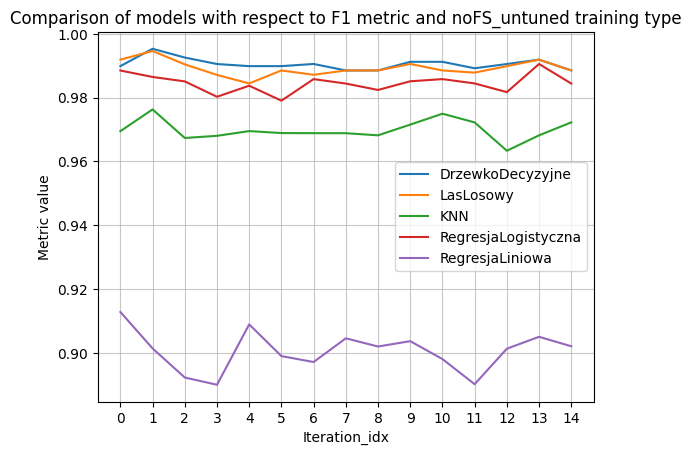

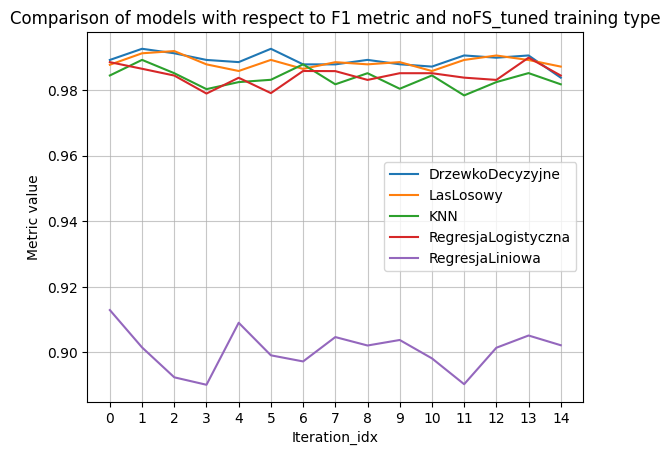

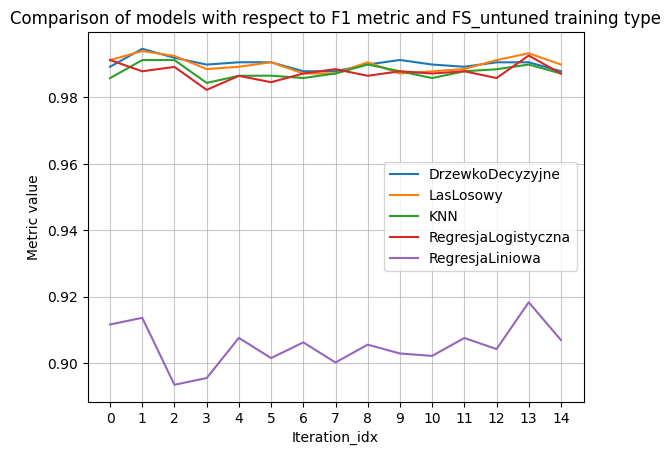

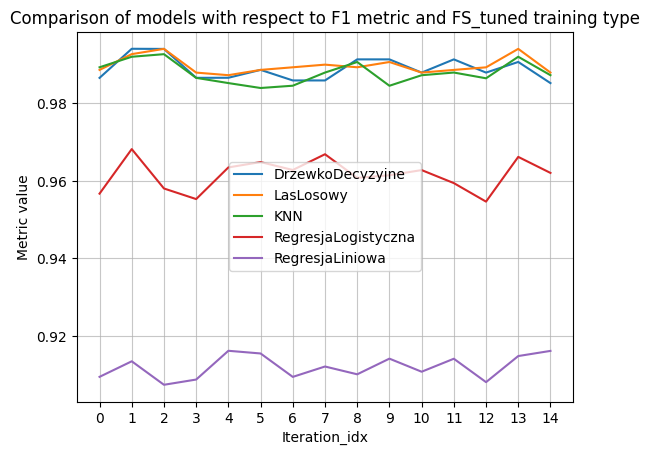

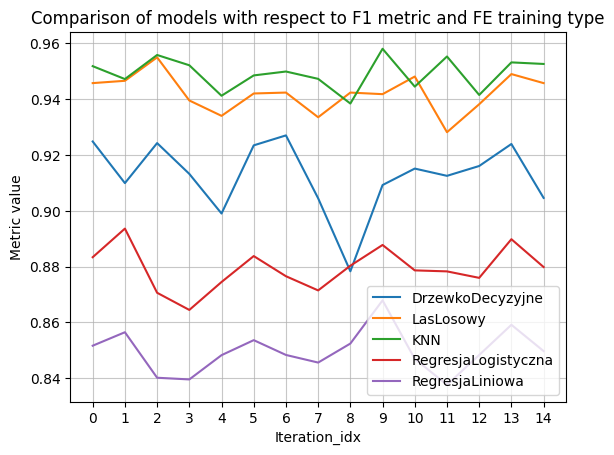

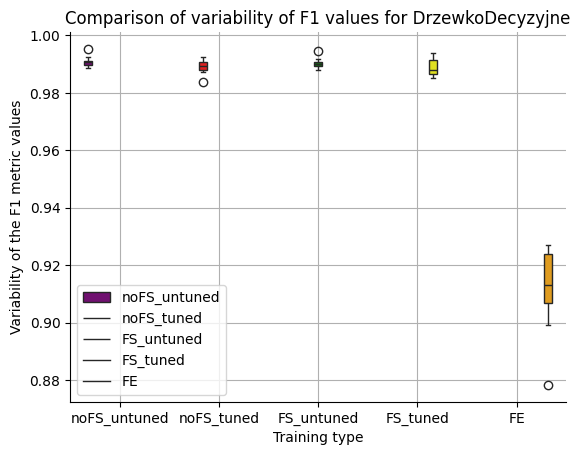

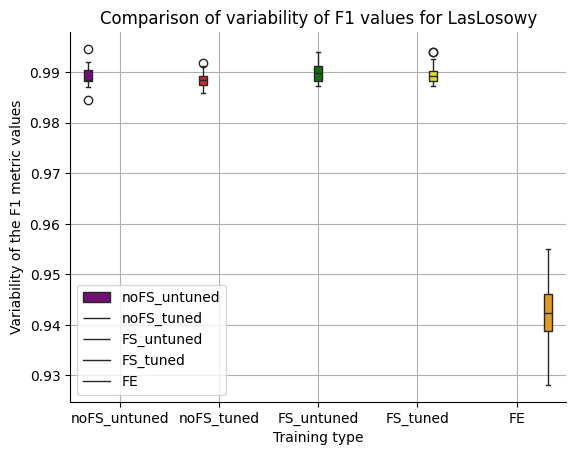

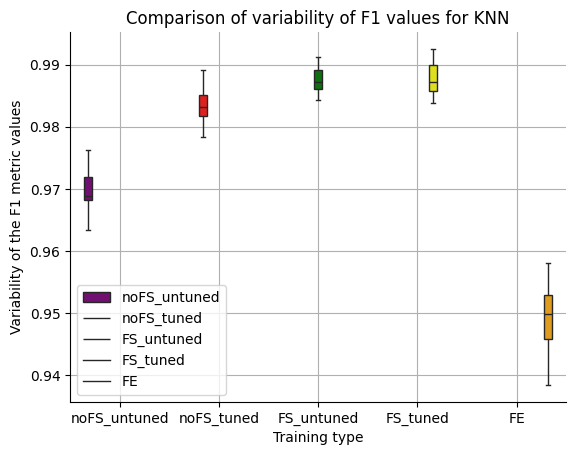

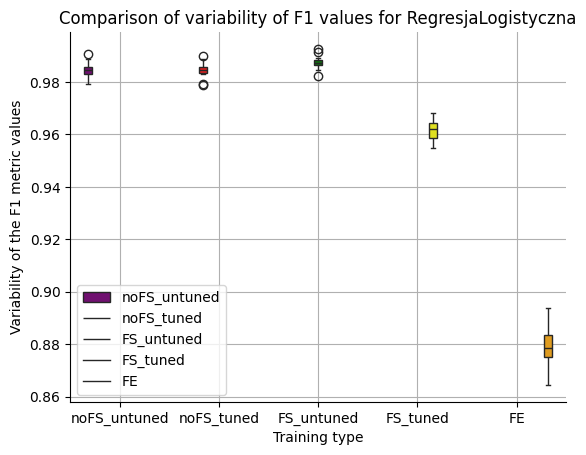

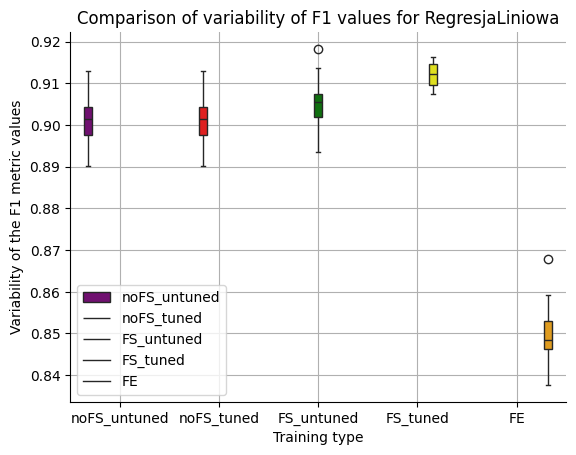

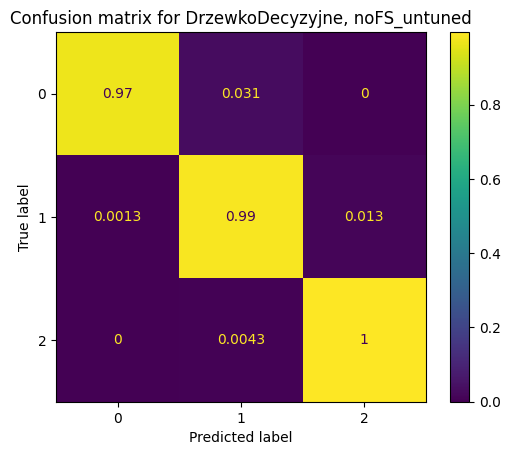

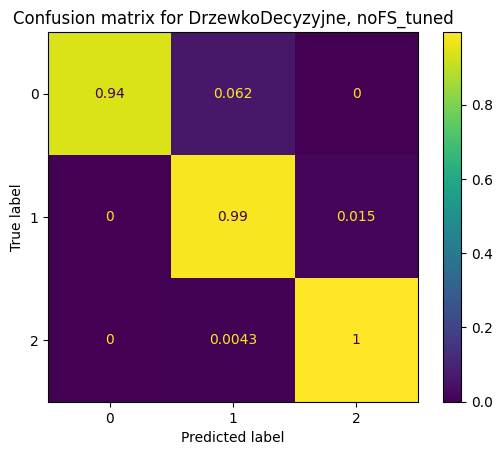

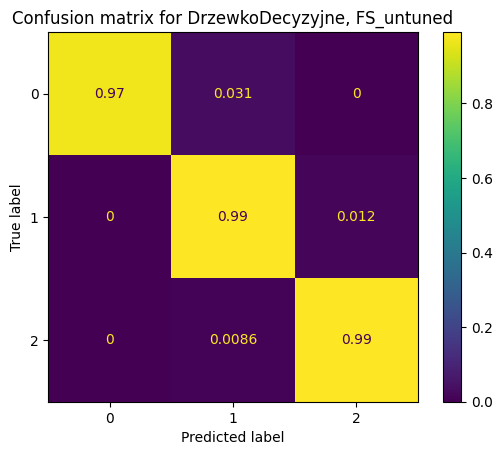

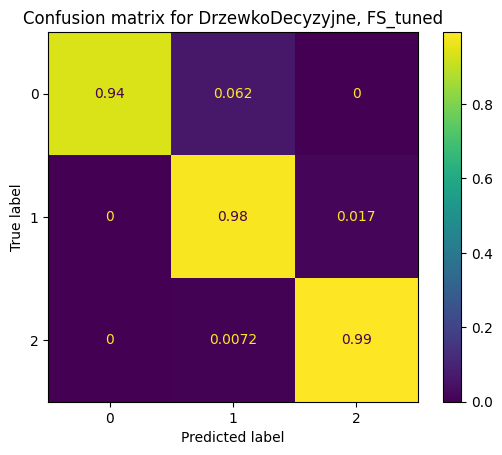

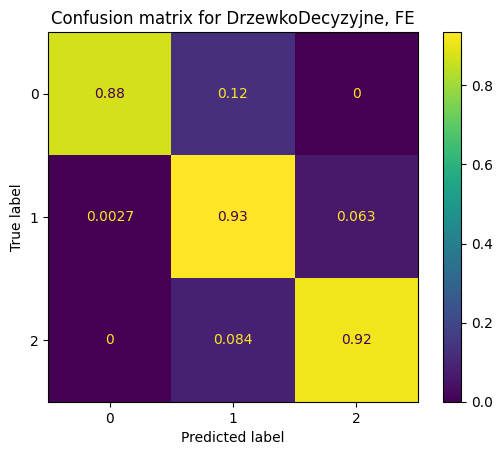

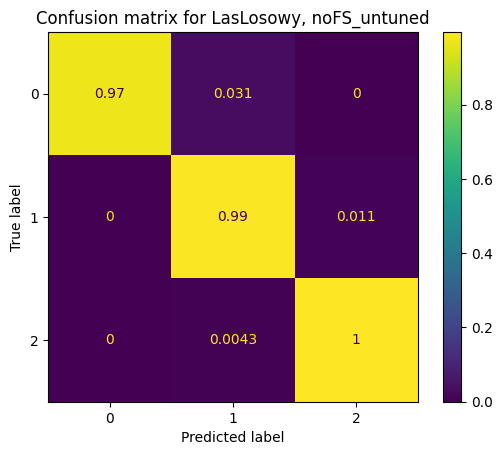

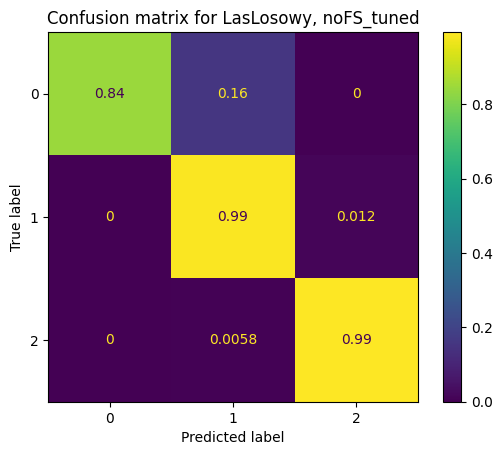

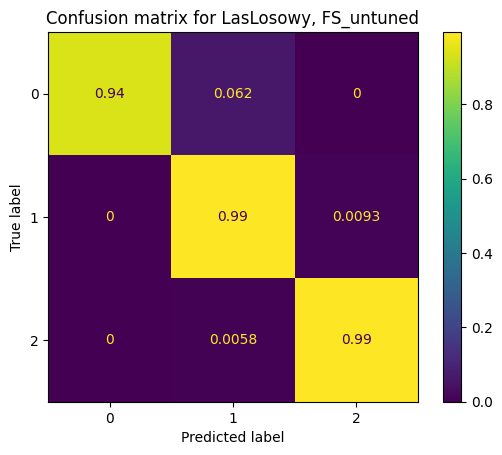

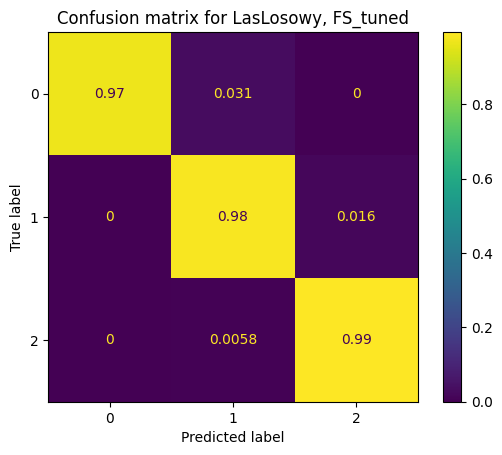

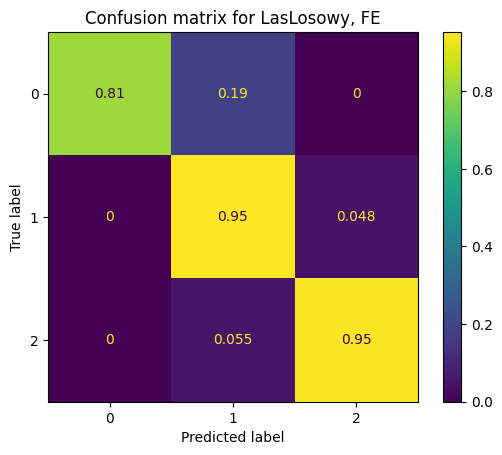

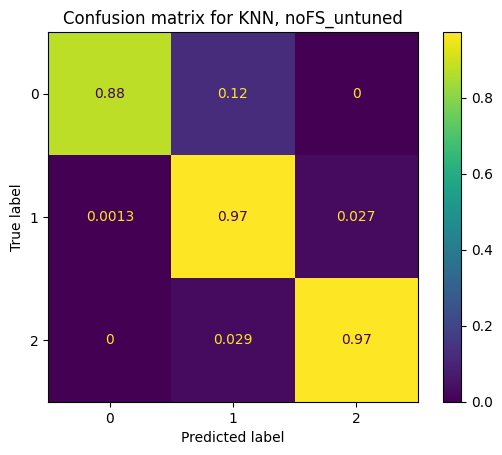

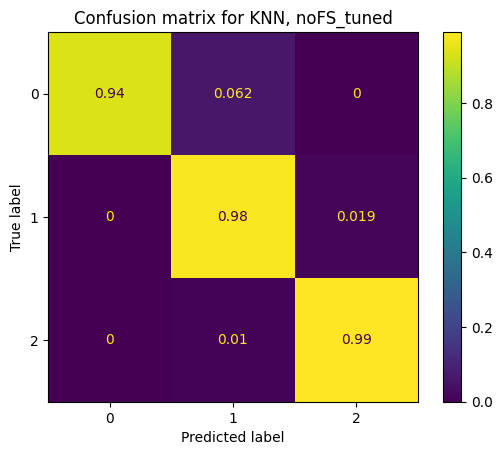

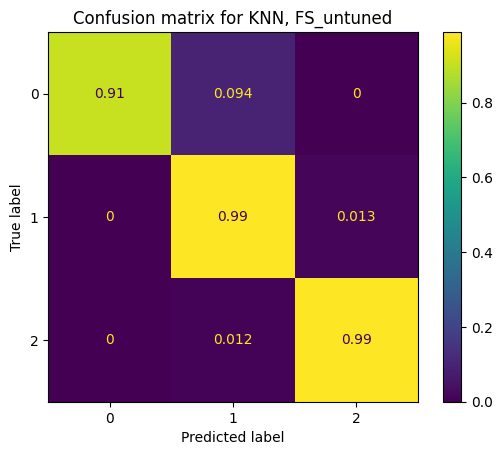

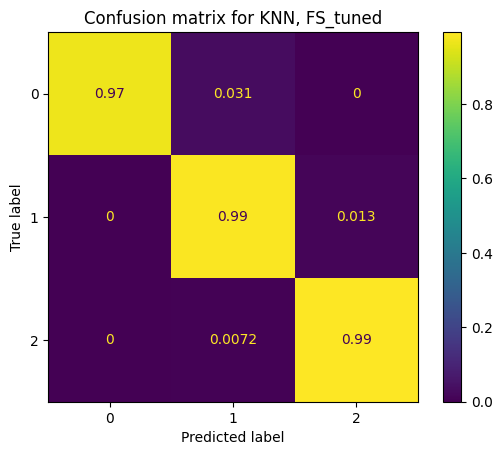

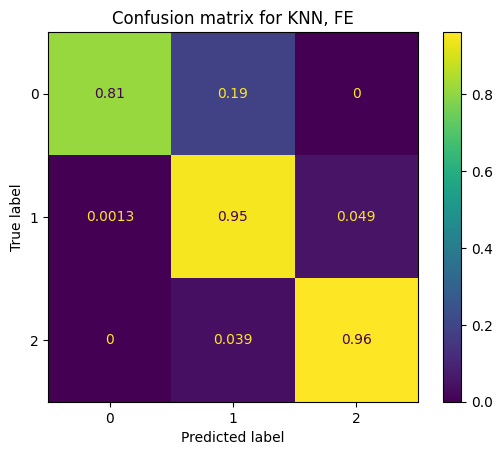

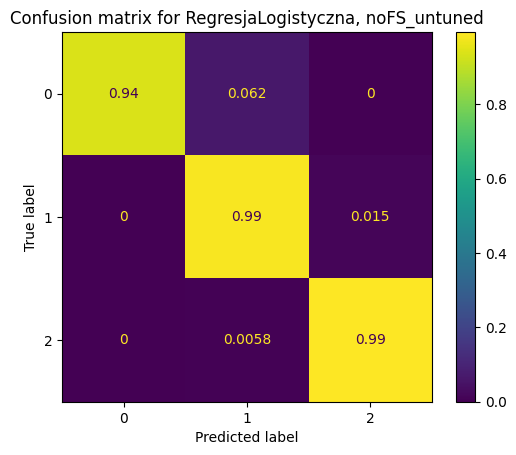

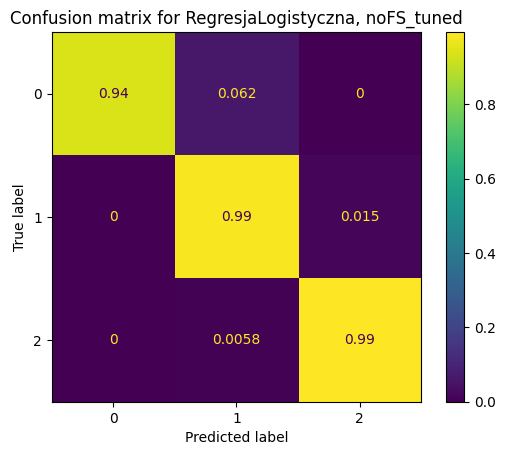

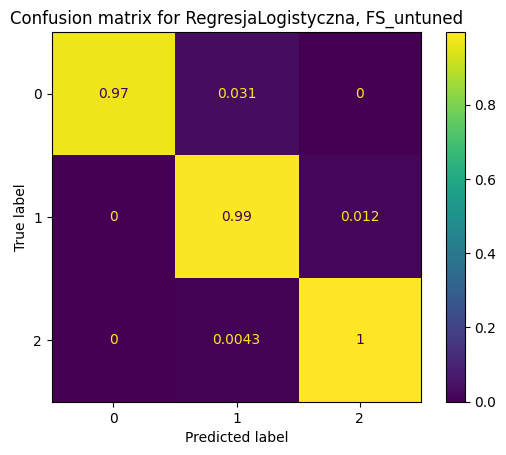

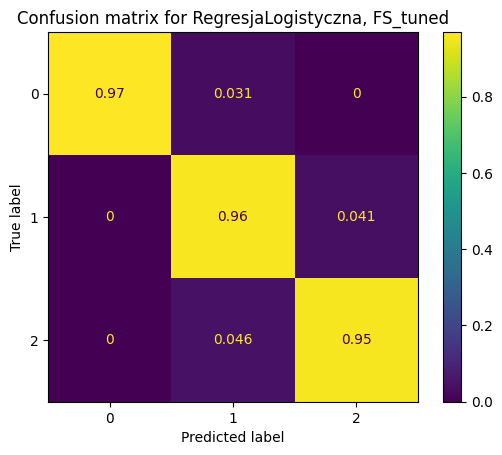

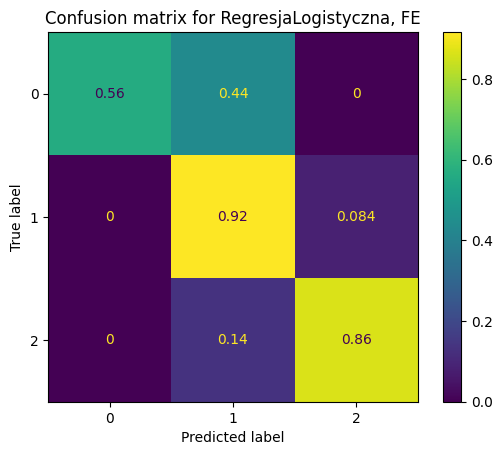

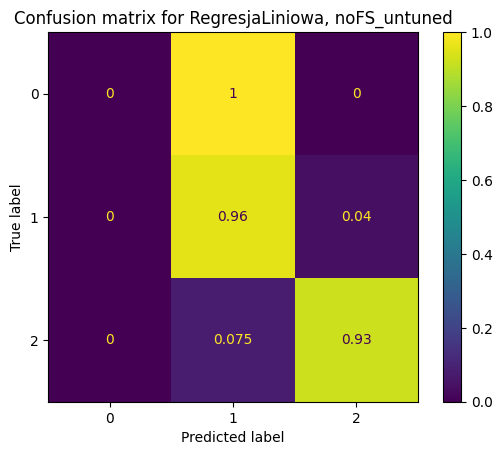

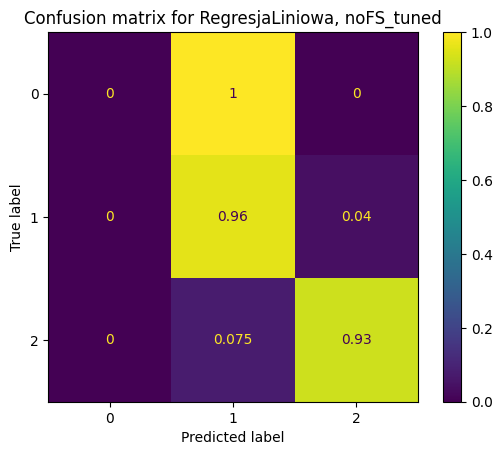

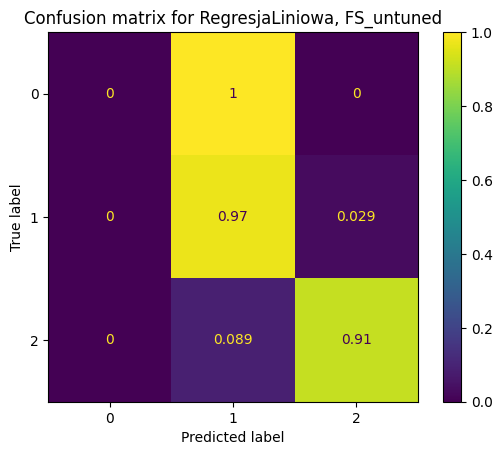

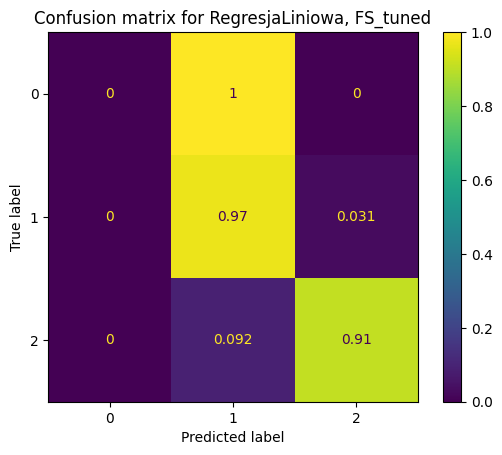

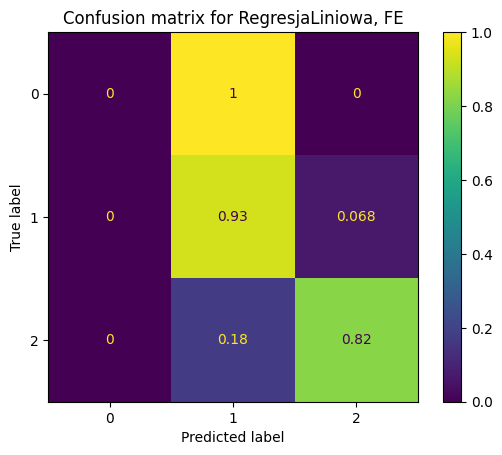

In [17]:
ModelComparator.compare_models()